# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

## Load the Data

In [73]:
df=pd.read_csv("Traffic_Accidents.csv")

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [75]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [76]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [77]:
df.shape

(52000, 26)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [78]:
#dropping duplicated
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [79]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [ ]:
#filling nulls with mode or drop it

In [80]:
print(df["Accident_Severity"].value_counts())
df["Accident_Severity"]=df["Accident_Severity"].fillna(df["Accident_Severity"].mode()[0])

Accident_Severity
3.0    43890
2.0     7080
1.0      665
Name: count, dtype: int64


In [81]:
print(df["Number_of_Casualties"].value_counts())
df["Number_of_Casualties"]=df["Number_of_Casualties"].fillna(df["Number_of_Casualties"].mode()[0])

Number_of_Casualties
1.0     39004
2.0      8189
3.0      2367
4.0       842
5.0       288
6.0       130
7.0        44
8.0        23
9.0         8
10.0        8
12.0        3
13.0        2
18.0        2
51.0        1
11.0        1
42.0        1
24.0        1
14.0        1
23.0        1
Name: count, dtype: int64


In [82]:
print(df["Light_Conditions"].value_counts())
df["Light_Conditions"]=df["Light_Conditions"].fillna(df["Light_Conditions"].mode()[0])

Light_Conditions
Daylight: Street light present               37711
Darkness: Street lights present and lit      10111
Darkeness: No street lighting                 2811
Darkness: Street lighting unknown              535
Darkness: Street lights present but unlit      245
Name: count, dtype: int64


In [83]:
print(df["Urban_or_Rural_Area"].value_counts())
df["Urban_or_Rural_Area"]=df["Urban_or_Rural_Area"].fillna(df["Urban_or_Rural_Area"].mode()[0])

Urban_or_Rural_Area
1.0    33222
2.0    18646
3.0        1
Name: count, dtype: int64


In [84]:
df["Speed_limit"]=df["Speed_limit"].fillna(df["Speed_limit"].mode()[0])
df["2nd_Road_Class"]=df["2nd_Road_Class"].fillna(df["2nd_Road_Class"].mode()[0])
df["2nd_Road_Number"]=df["2nd_Road_Number"].fillna(df["2nd_Road_Number"].mode()[0])
df["Weather_Conditions"]=df["Weather_Conditions"].fillna(df["Weather_Conditions"].mode()[0])
df["Road_Surface_Conditions"]=df["Road_Surface_Conditions"].fillna(df["Road_Surface_Conditions"].mode()[0])


In [85]:
df.dropna(inplace=True)
df.shape

(51957, 26)

In [86]:
#taking number features from the data to performe some processing
df_num=df.select_dtypes(include=np.number)

In [87]:
df_num.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,6,556,3,22,70,-1,0,2.0,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,1,26,4,466,30,6,0,1.0,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,4,746,6,0,30,3,4055,1.0,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,7,84,6,0,30,6,0,1.0,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,3,257,6,0,30,-1,0,1.0,2013


In [95]:
s=StandardScaler()
df_num[df_num.columns]=s.fit_transform(df_num)

In [89]:
df_num.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
0,1.263941,-1.213692,1.218684,-1.220392,0.649044,0.403074,-1.146149,-0.409865,0.970509,0.794873,-0.756681,-0.539821,2.170193,-1.145763,-0.294444,1.336375,-0.132885
1,0.720741,-0.697940,0.712490,-0.697295,-1.151755,0.403074,0.227723,-0.409865,-1.625172,-1.247618,-0.056443,-0.294015,-0.643879,1.038164,-0.294444,-0.748168,0.199644
2,-1.322958,-0.809742,-1.290400,-0.806163,1.236261,0.403074,0.227723,-0.409865,-0.067763,1.527086,1.344035,-0.552000,-0.643879,0.102195,2.816019,-0.748168,-1.462998
3,-1.036588,0.672689,-1.040362,0.676057,-1.034311,0.403074,-1.146149,0.769150,1.489645,-1.024100,1.344035,-0.552000,-0.643879,1.038164,-0.294444,-0.748168,-0.797941
4,-0.565738,0.311749,-0.554972,0.317875,-0.368799,0.403074,0.227723,0.769150,-0.586899,-0.357400,1.344035,-0.552000,-0.643879,-1.145763,-0.294444,-0.748168,1.197229


In [90]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [91]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [96]:
l=LabelEncoder()
df["Road_Type"]=l.fit_transform(df["Road_Type"])
df["Road_Surface_Conditions"]=l.fit_transform(df["Road_Surface_Conditions"])
df["Light_Conditions"]=l.fit_transform(df["Light_Conditions"])
df["Weather_Conditions"]=l.fit_transform(df["Weather_Conditions"])
df["Light_Conditions"]=l.fit_transform(df["Light_Conditions"])
df["Did_Police_Officer_Attend_Scene_of_Accident"]=l.fit_transform(df["Did_Police_Officer_Attend_Scene_of_Accident"])

In [97]:
df_num.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,1.263941,-1.213692,1.218684,-1.220392,0.649044,0.403074,-1.146149,-0.409865,0.970509,0.794873,...,-2.215815,2.170193,-1.145763,-0.294444,-2.912130,1.352426,-0.215477,1.336375,0.483721,-0.132885
1,0.720741,-0.697940,0.712490,-0.697295,-1.151755,0.403074,0.227723,-0.409865,-1.625172,-1.247618,...,0.479486,-0.643879,1.038164,-0.294444,-1.178088,-0.439790,-0.660717,-0.748168,0.483721,0.199644
2,-1.322958,-0.809742,-1.290400,-0.806163,1.236261,0.403074,0.227723,-0.409865,-0.067763,1.527086,...,0.479486,-0.643879,0.102195,2.816019,0.555953,-0.439790,-0.660717,-0.748168,0.483721,-1.462998
3,-1.036588,0.672689,-1.040362,0.676057,-1.034311,0.403074,-1.146149,0.769150,1.489645,-1.024100,...,-1.317381,-0.643879,1.038164,-0.294444,0.555953,1.949832,1.565481,-0.748168,0.483721,-0.797941
4,-0.565738,0.311749,-0.554972,0.317875,-0.368799,0.403074,0.227723,0.769150,-0.586899,-0.357400,...,0.479486,-0.643879,-1.145763,-0.294444,0.555953,-0.439790,-0.660717,-0.748168,0.483721,1.197229


In [49]:
pca=PCA(0.9)

In [131]:
pca_data=pca.fit_transform(df_num)
pca_data

array([[-0.29083227,  4.31720863, -0.95056715, ...,  1.75694924,
        -0.18704727,  0.30587662],
       [-2.47342066, -0.49342016,  0.38285471, ...,  1.39056099,
        -0.22737846, -0.67426435],
       [ 1.07629722, -1.49270781, -2.4411865 , ...,  0.05139869,
         1.83232858,  1.53995581],
       ...,
       [-1.18406187,  0.29731986, -1.16941445, ..., -0.81278984,
        -0.38117723, -0.43451964],
       [ 0.04584784, -0.98018171,  0.3601126 , ..., -0.80104358,
         0.09797094,  0.21256668],
       [ 0.23210172,  2.26927906, -0.8293466 , ..., -0.26027923,
         0.10596508, -0.2537585 ]])

In [63]:
df_num.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [94]:
df_num.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,6,556,...,0,70,-1,0,0,4,1,2.0,1,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,1,26,...,3,30,6,0,2,1,0,1.0,1,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,4,746,...,3,30,3,4055,4,1,0,1.0,1,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,7,84,...,1,30,6,0,4,5,5,1.0,1,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,3,257,...,3,30,-1,0,4,1,0,1.0,1,2013


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [125]:
x=df_num[["Location_Easting_OSGR","Location_Northing_OSGR"]]

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

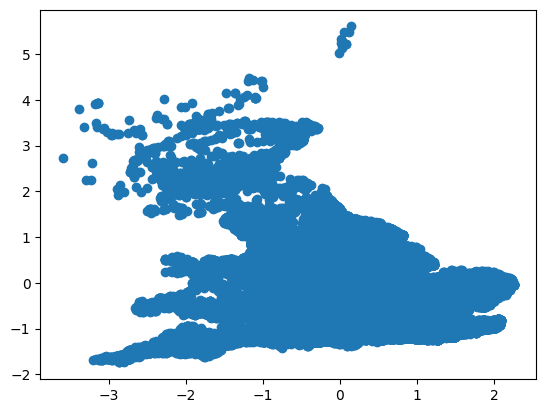

In [118]:
plt.scatter(df_num["Location_Easting_OSGR"],df_num["Location_Northing_OSGR"])

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [126]:
from sklearn.cluster import KMeans

In [127]:
la=[]
for i in range(1,12):
  kmean=KMeans(n_clusters=i)
  kmean.fit(x)
  la.append(kmean.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

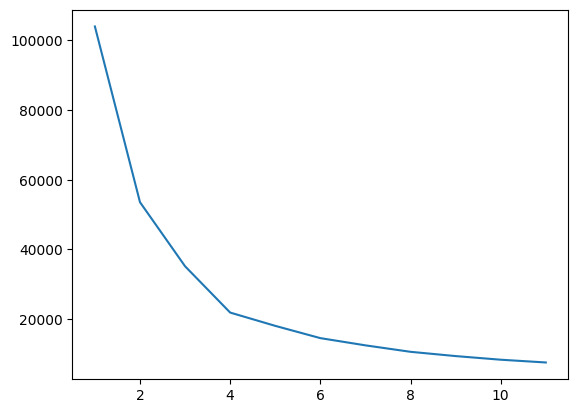

In [128]:
plt.plot(range(1,12),la)

In [129]:
kmean=KMeans(n_clusters=4)
kmean.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

## Evaluation
Evaluate the clustering result using appropriate metrics.


## Plot the data points with their predicted cluster center

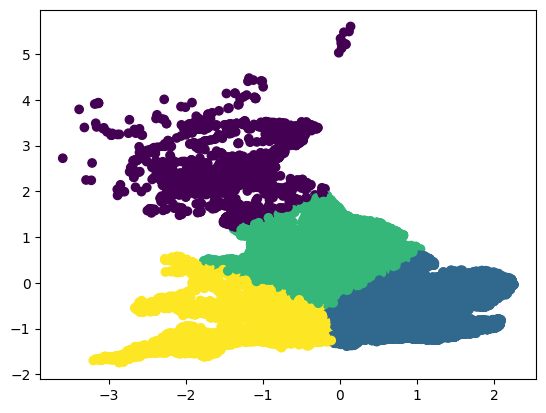

In [130]:
plt.scatter(x["Location_Easting_OSGR"],x["Location_Northing_OSGR"],c=kmean.labels_)

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?

   i have chosen the Location_Easting_OSGR and Location_Northing_OSGR to show where accidents happen


* **Number of Clusters Choices:**
   - How did you determine the optimal number?

   based in elbow method i chose 4 Clusters
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?

  Since it is Clustering there is no x and y hence we can't evlaute the model

* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?


   if there is more time and with help of gooogle i could show a real map with number of accidents for each area